In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import string

import nltk
from nltk.stem import PorterStemmer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# code available at: 
# https://github.com/andreipruteanu/pluralsight/blob/master/01_audition/text_classification_compare.ipynb
from svc_vs_nb import get_data_bbc_articles, truncate_dataset, \
                      split_and_convert, classify_bayes, classify_svc, plot_results

<h3>1) Read Dataset</h3>

In [3]:
# data is taken from: http://mlg.ucd.ie/datasets/bbc.html
df_raw = get_data_bbc_articles()

df_raw.head(10)

,text,label
0,owen set for skipper role wales number eight m...,3
1,newry to fight cup exit in courts newry city a...,2
2,underdogs have more fun i've always had a soft...,2
3,wilkinson fit to face edinburgh england captai...,3
4,faye plans to stay at portsmouth portsmouth mi...,2
5,ireland surge past scots ireland maintained th...,3
6,ferguson urges henry punishment sir alex fergu...,2
7,moyes u-turn on beattie dismissal everton mana...,2
8,injured butcher out of tour mark butcher has b...,1
9,australia unchanged for pakistan australia hav...,1


<h3>2) Pre-process Dataset</h3>

In [4]:
df = df_raw.copy()

# convert text labels from strings to numerical values
df['label'] = df.label.map({l: idx for idx, l in enumerate(set(df.label))})

df['text'] = df.text.map(lambda x: x.lower())

# remove all punctuation signs
df['text'] = df.text.str.replace('[^\w\s]', '')

# apply tokenization: divide a string into list of words
df['text'] = df['text'].apply(nltk.word_tokenize)

# perform word stemming. T remove all variations of words carrying
# the same meaning, regardless of the tense. Porter Stemmer stemming algorithm is the most popular:
stemmer = PorterStemmer()
df['text'] = df['text'].apply(lambda x: [stemmer.stem(y) for y in x])

df.head(10)

,text,label
0,"[owen, set, for, skipper, role, wale, number, ...",3
1,"[newri, to, fight, cup, exit, in, court, newri...",2
2,"[underdog, have, more, fun, ive, alway, had, a...",2
3,"[wilkinson, fit, to, face, edinburgh, england,...",3
4,"[fay, plan, to, stay, at, portsmouth, portsmou...",2
5,"[ireland, surg, past, scot, ireland, maintain,...",3
6,"[ferguson, urg, henri, punish, sir, alex, ferg...",2
7,"[moy, uturn, on, beatti, dismiss, everton, man...",2
8,"[injur, butcher, out, of, tour, mark, butcher,...",1
9,"[australia, unchang, for, pakistan, australia,...",1


In [5]:
def classify_dtree(x_test, x_train, y_test, y_train):
    # create Decision tree classifier
    model_dtree = DecisionTreeClassifier()
    
    # fit Decision tree classifier on training set
    model_dtree.fit(x_train, y_train)
    
    # predict on test dataset
    y_pred_dtree = model_dtree.predict(x_test)
    
    # Use 'accuracy_score()' function to compute the prediction accuracy
    _dtree_accuracy_score = accuracy_score(y_pred_dtree, y_test) * 100
    
    return _dtree_accuracy_score, y_pred_dtree

<h3>3) Define Run Procedure</h3>

In [6]:
def run(dataset: pd.DataFrame, test_size=0.3):
    """
    Do the actual training, fitting and testing of the models.
    :param dataset: input dataset
    :param test_size: how large the test is
    :return:
    """
    # train and split dataset into train and test parts
    x_test, x_train, y_test, y_train = split_and_convert(dataset, test_size)

    # 1. Bayes
    bayes_accuracy_score, y_pred_bayes = classify_bayes(x_test, x_train, y_test, y_train)

    # 2. SVM
    svm_accuracy_score, y_pred_svm = classify_svc(x_test, x_train, y_test, y_train)

    # 3. Decision Tree
    dtree_accuracy_score, y_pred_dtree = classify_dtree(x_test, x_train, y_test, y_train)

    return bayes_accuracy_score, svm_accuracy_score, dtree_accuracy_score

<h3>4) Run Experiment</h3>

In [7]:
results = pd.DataFrame(columns=['max_no_texts', 'classifier_type', 'exp_no', 'accuracy'])

min_texts = 25
max_texts = 275
step = 25
repeats = 30

# execute experiments
for mnt in range(min_texts, max_texts+step, step):
    
    # repeat experiment for the same parameters a couple of times
    for exp_no in range(repeats):
        print('Dataset length {}, exp_no: {}'.format(mnt, exp_no))
        
        # truncate dataset
        trauncated_dataset = truncate_dataset(dataset=df.copy(), max_texts=mnt)
        
        # run one experiment
        bayes_accuracy_score, svc_accuracy_score, dtree_accuracy_score = run(dataset=trauncated_dataset)
        
        # store results
        results = results.append({'max_no_texts': mnt, 'classifier_type': 'bayes',
                                  'exp_no': exp_no, 'accuracy': bayes_accuracy_score}, ignore_index=True)

        results = results.append({'max_no_texts': mnt, 'classifier_type': 'SVC',
                                  'exp_no': exp_no, 'accuracy': svc_accuracy_score}, ignore_index=True)
        
        results = results.append({'max_no_texts': mnt, 'classifier_type': 'DTree',
                                  'exp_no': exp_no, 'accuracy': dtree_accuracy_score}, ignore_index=True)

Dataset length 25, exp_no: 0
Dataset length 25, exp_no: 1
Dataset length 25, exp_no: 2
Dataset length 25, exp_no: 3
Dataset length 25, exp_no: 4
Dataset length 25, exp_no: 5
Dataset length 25, exp_no: 6
Dataset length 25, exp_no: 7
Dataset length 25, exp_no: 8
Dataset length 25, exp_no: 9
Dataset length 25, exp_no: 10
Dataset length 25, exp_no: 11
Dataset length 25, exp_no: 12
Dataset length 25, exp_no: 13
Dataset length 25, exp_no: 14
Dataset length 25, exp_no: 15
Dataset length 25, exp_no: 16
Dataset length 25, exp_no: 17
Dataset length 25, exp_no: 18
Dataset length 25, exp_no: 19
Dataset length 25, exp_no: 20
Dataset length 25, exp_no: 21
Dataset length 25, exp_no: 22
Dataset length 25, exp_no: 23
Dataset length 25, exp_no: 24
Dataset length 25, exp_no: 25
Dataset length 25, exp_no: 26
Dataset length 25, exp_no: 27
Dataset length 25, exp_no: 28
Dataset length 25, exp_no: 29
Dataset length 50, exp_no: 0
Dataset length 50, exp_no: 1
Dataset length 50, exp_no: 2
Dataset length 50, exp_

Dataset length 250, exp_no: 1
Dataset length 250, exp_no: 2
Dataset length 250, exp_no: 3
Dataset length 250, exp_no: 4
Dataset length 250, exp_no: 5
Dataset length 250, exp_no: 6
Dataset length 250, exp_no: 7
Dataset length 250, exp_no: 8
Dataset length 250, exp_no: 9
Dataset length 250, exp_no: 10
Dataset length 250, exp_no: 11
Dataset length 250, exp_no: 12
Dataset length 250, exp_no: 13
Dataset length 250, exp_no: 14
Dataset length 250, exp_no: 15
Dataset length 250, exp_no: 16
Dataset length 250, exp_no: 17
Dataset length 250, exp_no: 18
Dataset length 250, exp_no: 19
Dataset length 250, exp_no: 20
Dataset length 250, exp_no: 21
Dataset length 250, exp_no: 22
Dataset length 250, exp_no: 23
Dataset length 250, exp_no: 24
Dataset length 250, exp_no: 25
Dataset length 250, exp_no: 26
Dataset length 250, exp_no: 27
Dataset length 250, exp_no: 28
Dataset length 250, exp_no: 29
Dataset length 275, exp_no: 0
Dataset length 275, exp_no: 1
Dataset length 275, exp_no: 2
Dataset length 275, 

<h3>5) Plotting</h3>

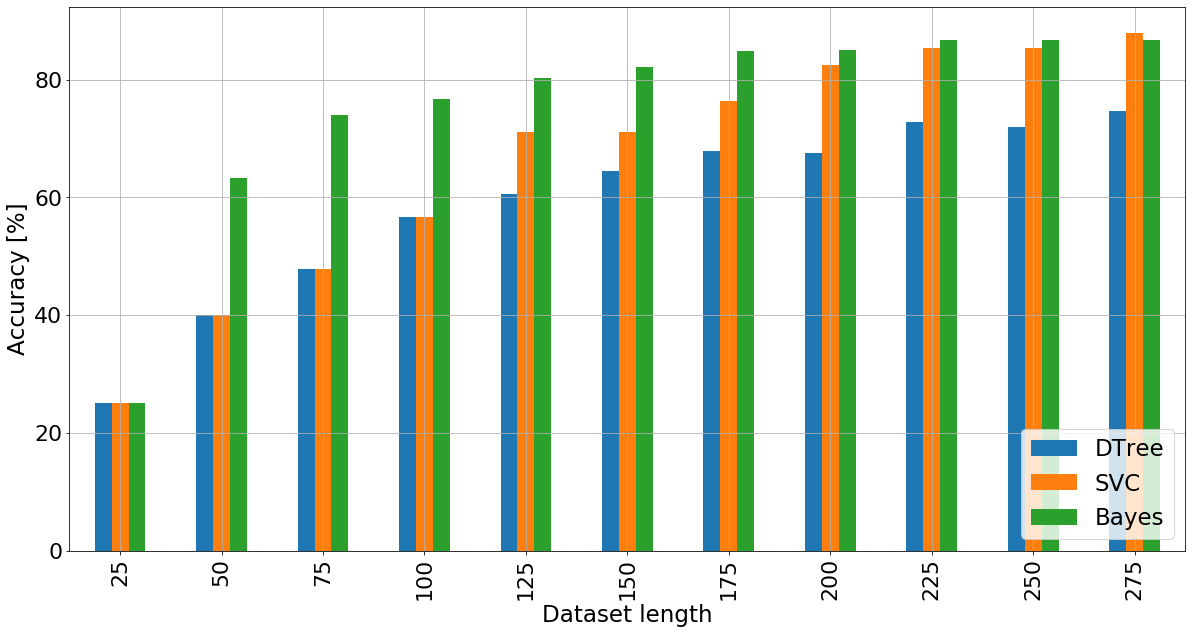

In [8]:
plot_results(results)